## Forces Shaping CRE: Technological Innovation and Disruption in Commercial Real Estate

### Spring 2021

### Professor Timothy H. Savage, Ph.D. CRE

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


#### [Who I am](https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html):
* Clinicial Assistant Professor at the NYU Schack Institute of Real Estate
* Faculty Director of the CREFC Center for Commercial Real Estate Finance
* Distinquished Fellow of the NAIOP Research Foundation
* Former Senior Managing Economist and Principal Data Scientist of CBRE Econometric Advisors
* Former visiting scholar at the Center for Urban Science & Progress at the NYU Tandon School of Engineering

## The Main Themes of This *Big Ideas* Course
1. The U.S. economy **was not** on sound footing prior to the arrival of COVID-19 in January 2020.
2. U.S. commercial real estate faced technological disruption **before** COVID-19.
3. **Future-proofing** our industry against accelerated change.   

## Course Syllabus Review

## The U.S. Economy and CRE
1. Some empirical regularities of the U.S. economy.
2. The yield curve as a barometer of market expectations of growth.
3. Federal Reserve intervention in shadow banking.
4. COVID-19 is an accelerant?

### Some empirical regularities

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

Text(0, 0.5, '%')

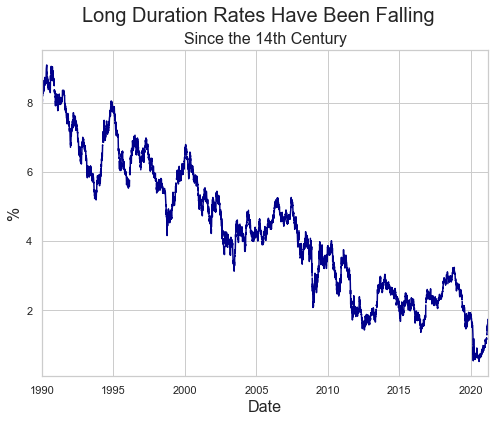

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 14th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, '%')

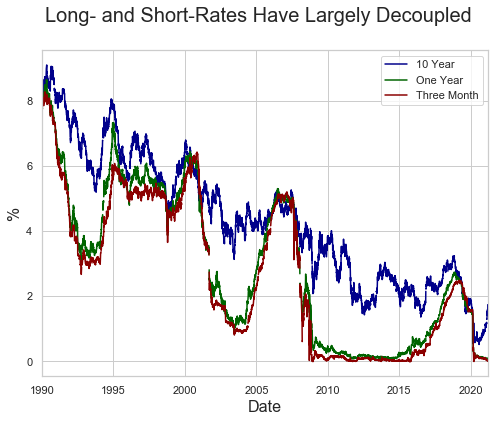

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

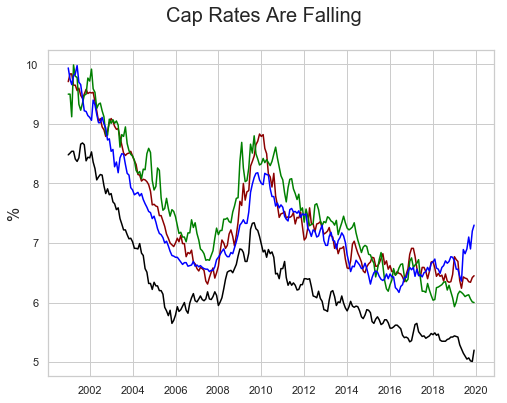

In [6]:
plt.figure(figsize = (8, 6))
plt.suptitle("Cap Rates Are Falling", fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.ylabel('%', fontsize=16)

### The yield curve as a barometer

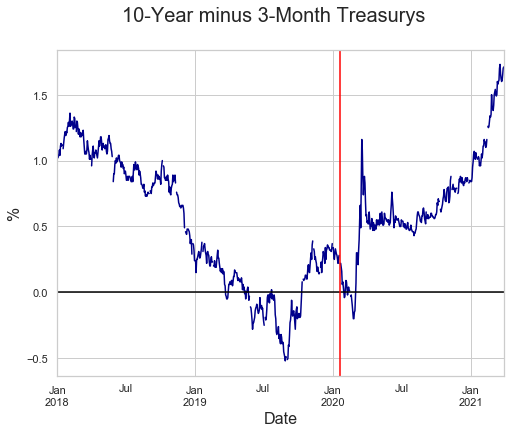

In [7]:
yield_curve = fred.get_series("T10Y3M", observation_start='2018-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year minus 3-Month Treasurys', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2020, 1, 19), color="red")

### Federal Reserve intervention

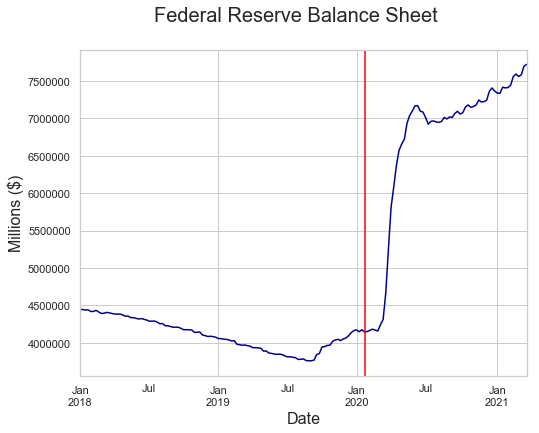

In [8]:
balance_sheet = fred.get_series("WALCL", observation_start='2018-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Millions ($)', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


### Healthy economies *do not*
* Have negative yield curves (see Professor Campbell Harvey).
* Require Fed intervention in overnight lending markets (see Global Financial Crisis).



### This occurred before COVID-19 entered the lexicon.
### Forward-looking equity markets as antennae.

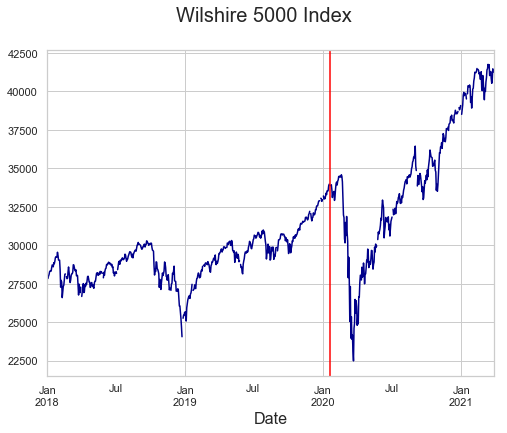

In [9]:
wilshire = fred.get_series("WILL5000PR", observation_start='2018-01-01')
wilshire.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Wilshire 5000 Index', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


## CRE Was Faced with Tech Disruption Before COVID-19
* Aggolomeration economics driving **global urbanization** and **density**.
* E-commerce driving **distributional efficiency** of goods.
* Co-working driving **value of optionality** in space markets.

## COVID-19 is an accelerant?
* Data and data science 
* Brokerage
* Hospitality and retail
* PropTech
* Whether the landscape has changed permanently

## Week 1 Panel: How Are Data and Data Science Disrupting Commercial Real Estate?
* Consider a function of data science: 
    * To use data to explore conjectures about how the world works in order to make *probabilistic predictions* about the future.
* Consider Ben Bernanke's claim of a *global savings glut*.
    * This is a conjecture about the relationship between short- and long-run interest rates.
    * Bernanke's conjecture states that the *Expectations Theory* of interest rates is breaking down.
    * This can be examined using data science.

Text(0, 0.5, '%')

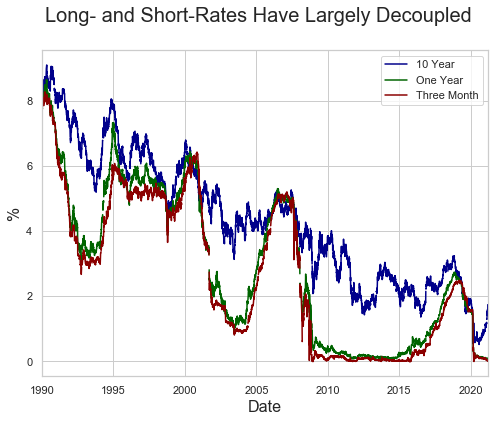

In [10]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

## Consider data availability in CRE
1. Accuracy
2. Granularity
3. Timeliness

## Week 2: How Is Tech Disrupting Brokerage?
* Traditional role of CRE brokerage:
    * To act as a market maker between tenants and landlords
        * *b $\cdot$ 6* $\approx$ location$^3$
        * Tenant rep and landlord rep
        * Requires detail understanding of local CRE markets: **accurate, granular and timely data**        

## Week 2: How Is Tech Disrupting Brokerage?

* Roles expanded into advising clients on property and asset acquisition, dispositions and deal structure (sale and lease back).
    * Capital market advisory
    * Financing sources
    * Related services such as space maintenance

## Week 2: How Is Tech Disrupting Brokerage?
* [CBRE](https://www.cbre.us)
    * Largest vertically-integrated CRE services firm in the world
    * [Market cap](https://www.marketwatch.com/investing/stock/cbre?mod=quote_search) of ~26 billion USD, but $\beta \approx$ 1.3 
    * Space market coverage in the U.S.
        * ~4 billion sqft of office
        * ~15 billion sqft of industrial
        * ~8 billion sqft of retail
        * ~16 million MF units        